In [2]:
%pip install spuco --upgrade

  Obtaining dependency information for spuco from https://files.pythonhosted.org/packages/eb/48/0a7d691f4f480aeb07cdeb3db6478297cadc9713a8f8c8a4b472db7badda/spuco-1.0.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: spuco
    Found existing installation: spuco 1.0
    Uninstalling spuco-1.0:
      Successfully uninstalled spuco-1.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spuco.datasets as dsets
from spuco.datasets.base_spuco_dataset import SpuriousFeatureDifficulty

In [3]:
import torchvision.transforms as T 

dataset = dsets.spuco_mnist.SpuCoMNIST(
    root="/data/mnist/",
    spurious_feature_difficulty=SpuriousFeatureDifficulty.MAGNITUDE_LARGE,
    spurious_correlation_strength=0.995,
    classes=[[0,1],[2,3],[4,5], [6,7],[8,9]],
    label_noise=0.001,
    core_feature_noise=0.1,
    transform=T.ToPILImage()
)
dataset.initialize()
print(len(dataset))
print(dataset.group_weights)

100%|██████████| 48004/48004 [00:04<00:00, 11741.96it/s]


48004
{(2, 2): 0.18654695442046496, (0, 0): 0.20975335388717606, (4, 4): 0.1954837096908591, (1, 1): 0.2002749770852429, (3, 3): 0.20187901008249312, (4, 3): 0.0002499791684026331, (1, 4): 0.0002499791684026331, (3, 0): 0.0003541371552370636, (2, 3): 0.00014582118156820264, (1, 0): 0.0003541371552370636, (4, 2): 0.0003333055578701775, (0, 2): 0.0002708107657695192, (4, 1): 0.0002708107657695192, (2, 0): 0.0003749687526039497, (0, 4): 0.00043746354470460794, (3, 2): 0.0002916423631364053, (1, 3): 0.0003333055578701775, (2, 1): 0.00039580034997083576, (4, 0): 0.0003124739605032914, (2, 4): 0.0002499791684026331, (3, 4): 0.0003749687526039497, (0, 3): 0.0002708107657695192, (0, 1): 0.00022914757103574703, (1, 2): 0.0002916423631364053, (3, 1): 0.0002708107657695192}


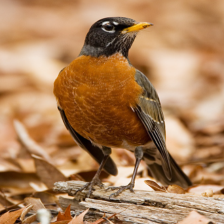

{(0, 0): 0.23809523809523808, (0, 1): 0.011904761904761904, (1, 0): 0.011904761904761904, (1, 1): 0.23809523809523808, (2, 2): 0.23809523809523808, (2, 3): 0.011904761904761904, (3, 2): 0.011904761904761904, (3, 3): 0.23809523809523808}


In [5]:
from spuco.datasets import SpuCoAnimals
import torchvision.transforms as T 

dataset = SpuCoAnimals(
    root="/data",
    transform=T.ToPILImage(),
    split="train"
)
dataset.initialize()
display(dataset[0][0])
print(dataset.group_weights)

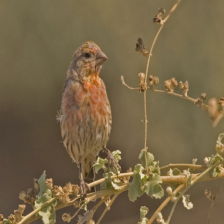

{(0, 0): 0.23809523809523808, (0, 1): 0.011904761904761904, (1, 0): 0.011904761904761904, (1, 1): 0.23809523809523808, (2, 2): 0.23809523809523808, (2, 3): 0.011904761904761904, (3, 2): 0.011904761904761904, (3, 3): 0.23809523809523808}


In [9]:
dataset = SpuCoAnimals(
    root="/data",
    transform=T.ToPILImage(),
    split="val"
)
dataset.initialize()
display(dataset[0][0])
print(dataset.group_weights)

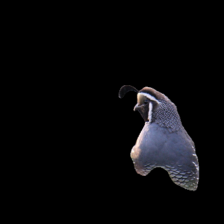

{(0, 0): 0.125, (0, 1): 0.125, (1, 0): 0.125, (1, 1): 0.125, (2, 2): 0.125, (2, 3): 0.125, (3, 2): 0.125, (3, 3): 0.125}


In [3]:
from spuco.datasets import SpuCoBirds, SpuCoDogs, SpuCoAnimals, MASK_SPURIOUS, MASK_CORE
import torchvision.transforms as T 

dataset = SpuCoAnimals(
    root="/data",
    transform=T.ToPILImage(),
    split="test",
    mask_type=MASK_SPURIOUS, # To mask out spurious feature
)
dataset.initialize()
display(dataset[1][0])
print(dataset.group_weights)